# String Image data to matrix 

In [3]:
import re
import io
import cv2
import base64
import numpy as np

In [8]:
imgData = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARgAAAEYCAYAAACHjumMAAAZkklEQVR4Xu2dd4wW5fbHD1UQvBJA2KUjIlIWQWqkSBdcYE0EYUMIHQyIEWl/iMCCMbISUUBFFAKIqJSIsvReFOkbpYPrUhdhCUVZQMr+ciaXvcgPeJ+Zd56ZM898n+TNC/iUcz5n7ufOOzVXdnZ2NqGBAAiAgAYCuSAYDVQxJQiAgEUAgsGGAAIgoI0ABKMNLSYGARCAYLANgAAIaCMAwWhDi4lBAAQgGGwDIAAC2ghAMNrQYmIQAAEIBtsACICANgIQjDa0mBgEQACCwTYAAiCgjQAEow0tJgYBEIBgsA2AAAhoIwDBaEOLiUEABCAYbAMgAALaCEAw2tBiYhAAAQgG2wAIgIA2AhCMNrSYGARAAILBNgACIKCNAASjDS0mBgEQgGCwDYAACGgjAMFoQ4uJQQAEIBhsAyAAAtoIQDDa0GJiEAABCAbbAAiAgDYCoRfM0aNHac+ePdZn48aN1vfVq1e1AdcxceHChalcuXJUq1Yt6/vez+OPP65jWcwJAhEJhEowkyZNomnTplFaWhrdvHkzIhxTOrBg7ieeu//NlFyRhywCoRFM8+bNacOGDbLoC4qG94Kee+456tSpE9WrV8/6c/78+QVFiFCCSCAUgvnwww9p6NChQayPbzE/8sgj1KhRI6pbt64lG/5UrlzZt3iwcDAJhEIwVapUocOHDwezQoKiLlSoENWuXZuaNm1KzJSF8/TTT1OxYsUERYlQJBEIhWB4V//GjRuSuBsVS5kyZah169Y0c+ZMo/JCMtETCIVgcuXKFT0pzBCRQMGCBSkxMZFmzJgRsS86hINAKATDZ1EuX74cjooKyJKP3/Tq1Ys+++wzAdEgBD8JhEIwbdu2pZUrV/rJOZRrV6tWjb7++mvr+hy0cBIIhWBSUlKoQ4cO4aywz1nnyZOHOnfuTBMmTLCuxUELF4FQCIZLmpSURGPHjn1gdfkMSc2aNal9+/ZUo0YNiouLo4oVK4rfGo4fP04P+1y6dElMDny2qX///vTee++JiQmB6CUQGsEwxh07dtCnn36ac8Fds2bNaODAgdaFZaY2Fsz9BLRv3z46cuQIZWVleZ46n3FatWqV5+tiQe8JhEow3uOVv+KhQ4cs8e7cuTPnc/36de2Bd+/enebMmaN9HSzgLwEIxl/+4lZnuWzbts36zJ8/n3hPR8fNn3nz5rXEhgPA4jYBVwOCYFzFaeZkmZmZdODAgZzPunXrLPHcunUrqoTLly9P6enpUc2BwbIJQDCy6yM6ur59+1qnoa9du+Y4zpIlS9KKFSuwJ+OYoOyBEIzs+gQiui5dutCiRYui2qMZMmQI8U2paGYRgGDMqqdv2aSmplK3bt1o//79jmPo3bs3bjNwTE/mQAhGZl0CG9WwYcMsSVy8eNFRDqNGjaLx48c7GotB8ghAMPJqYkRES5cupYSEBNs/m4oWLUrnz583ggGSIIJgsBVoIzBgwACaPn267fn5toIRI0bYHocB8ghAMPJqYlRETh5Vyne/83U4/FArtGATgGCCXb9ARM+3Y9h9dEPDhg1p69atgcgPQT6YAASDrcMTAseOHaP4+HjrAj3VhgO+qqTk9oNg5NbGyMj4TnVVyeCAb/A3AQgm+DUMVAZ8c2X9+vWVnzCIA76BKu//CxaCCXb9Ahl9cnIyjRw5Uin2//znP7R9+3Yc8FWiJa8TBCOvJqGIiO9BOnv2rFKu/KqU3bt3K/VFJ1kEIBhZ9QhNNGPGjKFx48Yp58v3KfH9SmjBIgDBBKteRkXboEED6+ePSitbtqz1ZD60YBGAYIJVL6OitXPAl99tdfv2baPyD0MyEEwYqiw4RzsHfLOzswVngtDuRwCCwXbhOwHVN29CML6XynYAEIxtZBjgNgEIxm2icuaDYOTUIrSRQDDmlh6CMbe2gckMgglMqWwHCsHYRoYBbhOAYNwmKmc+CEZOLUIbCQRjbukhGHNrG5jMIJjAlMp2oBCMbWQY4DYBCMZtonLmg2Dk1CKUkRw+fFj5TmlcBxO8TQSCCV7NjIp44sSJNHz48Ig58busb9y4EbEfOsgiAMHIqkfoolF9KHhsbCydPn06dHyCnjAEE/QKBjj+kydPEt8lrdIGDRpEU6dOVemKPoIIQDCCihG2UHr06EFz5sxRSjsjI4NiYmKU+qKTHAIQjJxahC4SfhzmX3/9FTFvfhtBSkpKxH7oII8ABCOvJqGIiN/4yG9+VGnTpk1T7qsyH/p4RwCC8Y41VrqLQN26dWnXrl1KTNLS0qhixYpKfdFJFgEIRlY9QhGNnb2X0qVLEx8MRgsmAQgmmHULdNR29l6GDh1KfK0MWjAJQDDBrFtgo8beS2BL5yhwCMYRNgxySqBUqVLEp5xV2ueff079+/dX6Yo+QglAMEILY2JYqlftcu516tShnTt3moghVDlBMKEqtz/J8j1EPXv2pHnz5ikHgL0XZVSiO0IwossT/OD49bAJCQn0yy+/KCeDvRdlVOI7QjDiSxTcAPlRDHzGSOVq3buzxN5LcGt+b+QQjDm1FJXJtm3bqGHDhrZjKlKkCF24cMH2OAyQSQCCkVmXQEfVq1cvmjVrlqMcBg8eTJMnT3Y0FoPkEYBg5NUksBGlpqZSYmIiHTx40FEOL7/8Mn3//feOxmKQTAIQjMy6BC6qjz76iN5++23KyspyFPsbb7xBH3/8saOxGCSXAAQjtzaBiIz3WpKSkmjx4sWO412wYAF16tTJ8XgMlEsAgpFbG/GR8V4Ly+XixYuOYi1QoACtWbOGGjVq5Gg8BsknAMHIr5G4CN3Ya3nqqado1apVeAyDuOq6GxAE4y5P42eLdq+FATVr1oyWL19OvAeDZjYBCMbs+rqWnRt7LRxMgwYNbF3V61oCmMgXAhCML9iDtWifPn1o7ty59M8//0QVeOPGjWnz5s1RzYHBwSIAwQSrXp5GyxfL8UHc9PT0qNbNly+f9dgFvHYkKoyBHAzBBLJs+oLmM0IsltmzZxP/LIq28cVzY8aMoVq1akU7FcYHkAAEE8Ci6QiZ91JYKiyXaPdYOD6+p4jF8uabb+oIF3MGhAAEE5BC6QqT91LuiMXp9Sz3xoa9Fl3VCt68EEzwauZKxBs2bMgRiysTYq/FLYxGzQPBGFXOhydz5swZSk5Opq+++ooyMzNdzRx7La7iNGYyCMaYUt4/EX6n0MKFC2nRokW0ZcsW17MtVKgQvfvuuzjW4jpZMyaEYMyo47+y4IO0LJUlS5bQpk2btGVYsmRJWrFiBc4QaSMc/IkhmODX0MrgyJEj9OOPP9KyZcto3bp1WrMqXry49dwXPBhKK2YjJodgAlxGfuYtC4U/q1ev1p4JvxmgR48e1r1EaCCgQgCCUaH03z58OnfYsGGuHyC1EYLnXfl6ljtiwcVynuMP/IIQjGIJ7bw0THFK0d0qVKiQIxb+MxoIOCEAwShQGz16NI0fP16hZ/C78F4K/wzivRbee0EDgWgIQDAK9KpVq0YHDhxQ6BncLk8++SS98847lljQQMAtAhCMAsn8+fMTv/7UxFauXDnq168fjRo1ysT0kJPPBCAYhQKYJpj27dtT27ZtrU+lSpUUCKALCDgjAMEocDPhJ1KHDh0oPj7ekkr58uUVskYXEIieAASjwDCoB3lZJq+88oollTJlyihkii4g4C4BCEaRZ1BOU7dq1Yq6dOlC/DMoJiZGMTt0AwE9BCAYG1z5QrvXXnuNrl27ZmOUd11jY2OpTZs21LJlS2ratCl+CnmHHis9gAAE42DT4NO5kyZNoitXrjgY7d2QqlWrEu/R8KX9zz//PPZovEOPlf5LAIKJYlMYPHiw9cpUfiRCEBq/MoT3blg2/DZFXEgXhKoFO0YIxoX6nT9/3rqb+X6fy5cvu7CC+1Pkzp3bkg2/SoRlw9IpWLCg+wthxlATgGA0lz8tLY34rudDhw5Z31u3brW+s7KyKDs7W/Pq6tPz3gwft7kjGxYOSwgNBKIhAMFEQy/KsT///DPxh6XD3/xISyktT548VKJECUpISKChQ4cSv0saDQTsEoBg7BLT2J8lw28+vCOdc+fOaVzN3tR8wLhjx47W6W/+WYUGAioEIBgVSj712b59O23cuNF67OVPP/1EFy5c8CmSfy9brFgxunNlMF8fxH9HA4H7EYBgArRd7N69m7744gvrCXanT5+mmzdvioi+Xbt2xJ8WLVpQ9erVRcSEIGQQgGBk1MF2FLdv37Z+TvGeDX/4jQESzljVqVPHutiPZcMfHCi2XVqjBkAwhpSTz0qtX78+RzYsHZaQn43vf2rdujXxzyiWTenSpf0MB2v7QACC8QG6F0vytTksHD6Gw7LZs2ePF8s+dA08e8b3EngeAATjOXJ/Fjx16pT1OhOWDv+c4osC/Wp4ep5f5L1fF4LxnrmIFX///XdLOPzh91T7cQ0Onv8rYlPQGgQEoxVvcCbft28fTZ8+nebPn09//vmnp1cZ4w0GwdlO7EYKwdglFoL+J06coLVr1+Z8MjIyPMka72DyBLOni0AwnuIO3mJ8Joqvu1mzZo0lnL1793qSBN4i6Qlm7YtAMNoRm7UAX+zHwmHZ8LEb3Y1/PvXu3dt6pQpa8AhAMMGrmZiI+V6plJQUWrp0qSWcixcvaoutcuXK1l3oaMEiAMEEq16io+WfUXeEc/ToUddj7datG82dO9f1eTGhPgIQjD62oZ754MGDNGXKFOusVGZmpmssxo4dS2PGjHFtPkyklwAEo5cvZieyjtXwA9NnzZrlCg9IxhWMnkwCwXiCGYswgdTU1BzRRHu8BpIJxjYFwQSjTkZFmZ6eniMa/rPTBsk4JefdOAjGO9ZY6R4CvBfDP5v45xPv3ThpkIwTat6NgWC8Y42VHkKARZOUlERO9mj41bjLly8HX4EEIBiBRQlzSF27dqXvvvvONoK4uDj69ddfbY/DAL0EIBi9fDG7AwK8J8M/fey2yZMnE78MD00OAQhGTi0QyV0EnEiGH2h17NgxcBREAIIRVAyE8m8CTiTDb2Bo0qQJUAohAMEIKQTCuD8Bu5Lp06cPffnll8AphAAEI6QQCOPBBOxIJl++fNbzh/H6FBlbFAQjow6IIgKBxMRE+vbbb5U4jRgxgiZMmKDUF530EoBg9PLF7C4S4GfDqBzEjYmJsfZi+BvNXwIQjL/8sboNAjNmzKC+ffsqjeA9GN6TQfOXAATjL3+sboPAjRs3qHbt2sQPKI/U+BgM78XwMRk0/whAMP6xx8oOCCQnJ9PIkSOVRvLZJD6rhOYfAQjGP/ZY2QEBfn8T78WovMcJF945AOzyEAjGZaCYTj8B3oPhPRmV9sEHH9CwYcNUuqKPBgIQjAaomFIvAT4Gw3sxfEwmUuPX1PJbLNH8IQDB+MMdq0ZJgM8m8VmlSC137tx069atSN3w3zURgGA0gcW0egls3ryZmjZtqrRIdna2Uj90cp8ABOM+U8zoEYFcuXIprQTBKGHS0gmC0YIVk3pBAILxgnJ0a0Aw0fHDaB8JQDA+wldcGoJRBIVu8ghAMPJqcm9EEIz8GiHC+xDg91RXqVJFiQ2OwShh0tIJgtGCFZPqJjBx4kQaPnx4xGXy5s2rdL1MxInQwREBCMYRNgzym0Dz5s2tV9JGarGxsXT69OlI3fDfNRGAYDSBxbT6CJw8eZLKli2rtMCgQYNo6tSpSn3RyX0CEIz7TDGjZgL9+vVTfu5uRkYGHjyluR4Pmx6C8RE+lnZGoEiRInTp0qWIg+Pj4yklJSViP3TQRwCC0ccWM2sgYOd5MNOmTaMBAwZoiAJTqhKAYFRJoZ/vBA4dOkT169eny5cvK8WSlpZGFStWVOqLTnoIQDB6uGJWDQT4EQ2pqalKM/NB4OPHjyv1RSd9BCAYfWwxs4sEOnbsSEuWLFGe8f3331d+tKbypOhomwAEYxsZBnhNoGfPnjR79mzlZevVq0fbt29X7o+O+ghAMPrYYuYoCfCZoq5du9KKFSuUZ3rsscdox44dyrcRKE+Mjo4IQDCOsGGQbgInTpygZs2aER+otdPwPiQ7tPT3hWD0M8YKNgns3buX4uLibI4iKlq0KJ0/f972OAzQRwCC0ccWMzsgYOdRmPdOj3dSOwCueQgEoxkwplcn8Prrr9Mnn3yiPuCunp07d6b58+c7GotB+ghAMPrYYmYbBF544QXatGmTjRH/6zpw4EDHYnK0IAYpE4BglFGhoy4Cbdq0odWrVzuaft68eZSYmOhoLAbpJwDB6GeMFR5CgN8dPXPmTEeM1qxZQy1btnQ0FoO8IQDBeMMZq9xD4OrVq9SjRw9asGCBbTYlSpSgtWvXUo0aNWyPxQBvCUAw3vLGakR09uxZeumll2jXrl22eTz77LO0atUqYsmgyScAwcivkVER8nui+VL+Cxcu2M6rbdu2tHz5ctvjMMA/AhCMf+xDtzLfCc13RDtp/AzedevWORmKMT4SgGB8hB+mpfmAbOvWrR2l3K5dO1q2bJmjsRjkLwEIxl/+xq9+5swZeuutt+ibb75xlGvv3r1pxowZjsZikP8EIBj/a2BcBKdOnaKFCxdany1btjjOb86cOdS9e3fH4zHQfwIQjP81MCKCY8eO0aJFi2jx4sXE9xNF2/gnEf80Qgs2AQgm2PXzNXp+lALvpfCZHZWXoKkEW6hQIVq/fr11pgkt+AQgmODX0NMM+J3Q/CoQ3sPgi93cbPyAbp4TD+p2k6q/c0Ew/vIPxOosFd5LYanwRW46WoMGDaz7kfiJdGjmEIBgzKmlq5ns27ePpkyZYv0E0v0QJ36g9w8//OBq/JhMBgEIRkYdfI/i1q1b1h4Kf/gZuOnp6Z7EhAvoPMHs2yIQjG/o/V/46NGjOT97+CpZvgHRy9aiRQvXj+N4GT/WikwAgonMyKgefJyDr6ploezcudOX3PjZuUOGDKFRo0b5sj4W9Y4ABOMda19W4ove+MwMC4U//LR+P1r79u2Jb1bkT6VKlfwIAWv6QACC8QG6G0v+/fffxJfhZ2RkWN/3/nn//v3Wv12/ft2N5RzNwQdv+WI5lkqFChUczYFBwSYAwQir372ieJBEWDASW3x8PCUkJFhS4fdDo4WbAATjU/353T+//fYb8ffKlSvpwIEDlJWV5VM00S374osv0quvvmpJpVSpUtFNhtFGEYBgNJfzjz/+yBEJ/2y58/Hzp4sbKfOzcLt06UL8M6hkyZJuTIk5DCQAwbhU1HPnzuXI426R8E8cE1quXLmsNyeyUJKTk6l48eImpIUcNBMInWCuXbtGV65csT58HOPOnyN9P6hvZmamNc/Nmzc1l8r76fmeoFatWlnviOYL4mJjY70PAisGmoBIwezYsYPGjRtn3aEr9WBmoKv+kOAbN25M/J4ilkqTJk1MTRN5eURAnGCSkpJo7NixHqWPZR599FHq0KGDdYCW91LKly8PKCDgGgFRguHHAPDGjqaXQOXKlYkvfONTyiyV3Llz610Qs4eWgCjBDBgwgKZPnx7aYuhM/IknnrAeuj169GiqUqWKzqUwNwjkEBAlGP5/Vr4BD02NQOHChSkmJsY6+Mrf9/757r+rzYheIOAuAQjGXZ6uzFagQAHr2pJq1ardVxx3hMKCQQMByQRECSZsP5FKly5tvV+5atWq//rgGhPJ/5NBbHYIiBKMqQd5eY8kLi6OatasmSOUZ555Bmds7Gyp6BtIAqIEwwSDfpqanynLeyR82pelUr16devvaCAQRgLiBMNF0H2hXf78+Ylfj1GsWDHr+94PH9u4379H6st7KmggAAL/IyBSMCgQCICAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQQgGDPqiCxAQCQBCEZkWRAUCJhBAIIxo47IAgREEoBgRJYFQYGAGQT+D/tcPl460rPSAAAAAElFTkSuQmCC'

In [15]:
image_b64 = imgData.split(",")[1]
binary = base64.b64decode(image_b64)
image = np.asarray(bytearray(binary), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE) #IMREAD_COLOR 

In [16]:
from PIL import Image
imge = Image.fromarray(img)
#img.save('my.png')
imge.show()

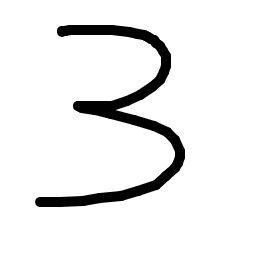

In [18]:
imge

In [17]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [20]:
x = np.invert(img)
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
x.shape

(280, 280)

In [22]:
x = cv2.resize(x, (28, 28))
x.shape

(28, 28)

In [23]:
# convert to a 4D tensor to feed into our model
x = x.reshape(1, 28, 28, 1)  # (img#, dim_x, dim_y, rgb)

In [24]:
x

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    